In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split as tts
import warnings
import pickle
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,6)

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [6]:
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [7]:
df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [8]:
df = pd.concat([df_train, df_test], axis = 0)

In [9]:
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name                    0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [10]:
for i in df.columns:
    print(i, '->', df[i].nunique())

profile pic -> 2
nums/length username -> 58
fullname words -> 11
nums/length fullname -> 27
name -> 2
description length -> 114
external URL -> 2
private -> 2
#posts -> 211
#followers -> 435
#follows -> 468
fake -> 2


In [11]:
df['profile pic'].unique(), df['fullname words'].unique(), df['name'].unique()

(array([1, 0], dtype=int64),
 array([ 0,  2,  1,  4,  3,  6, 12,  5, 10,  9,  7], dtype=int64),
 array([0, 1], dtype=int64))

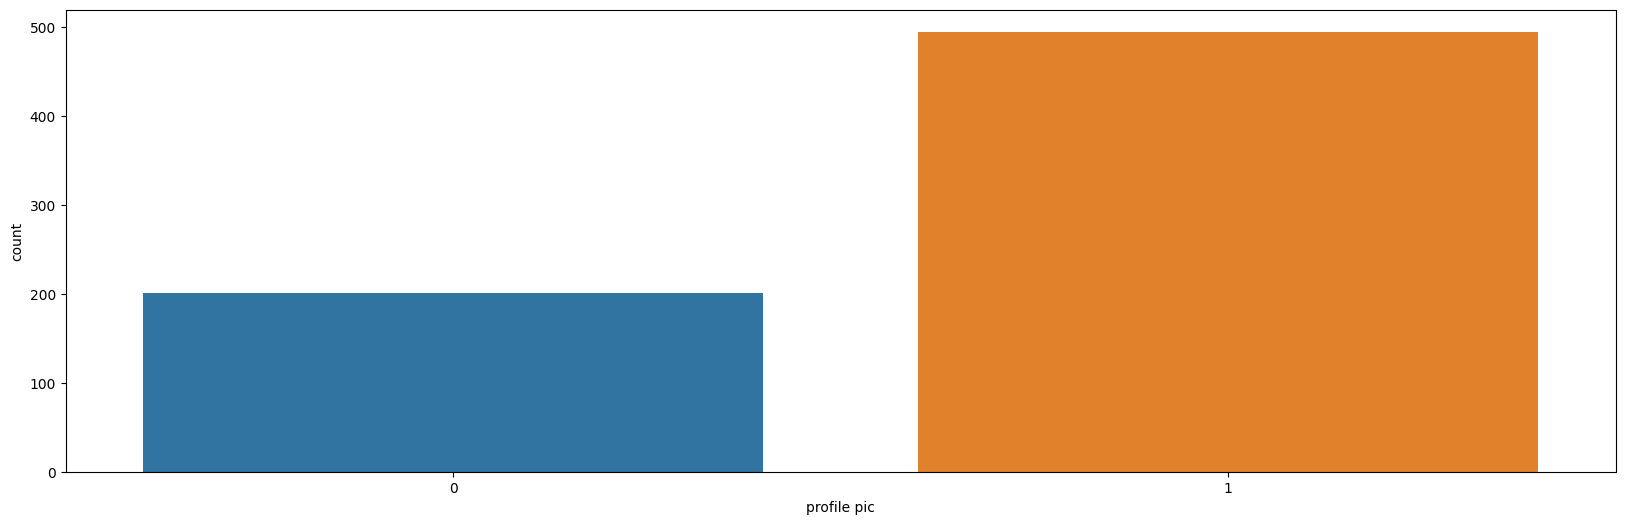

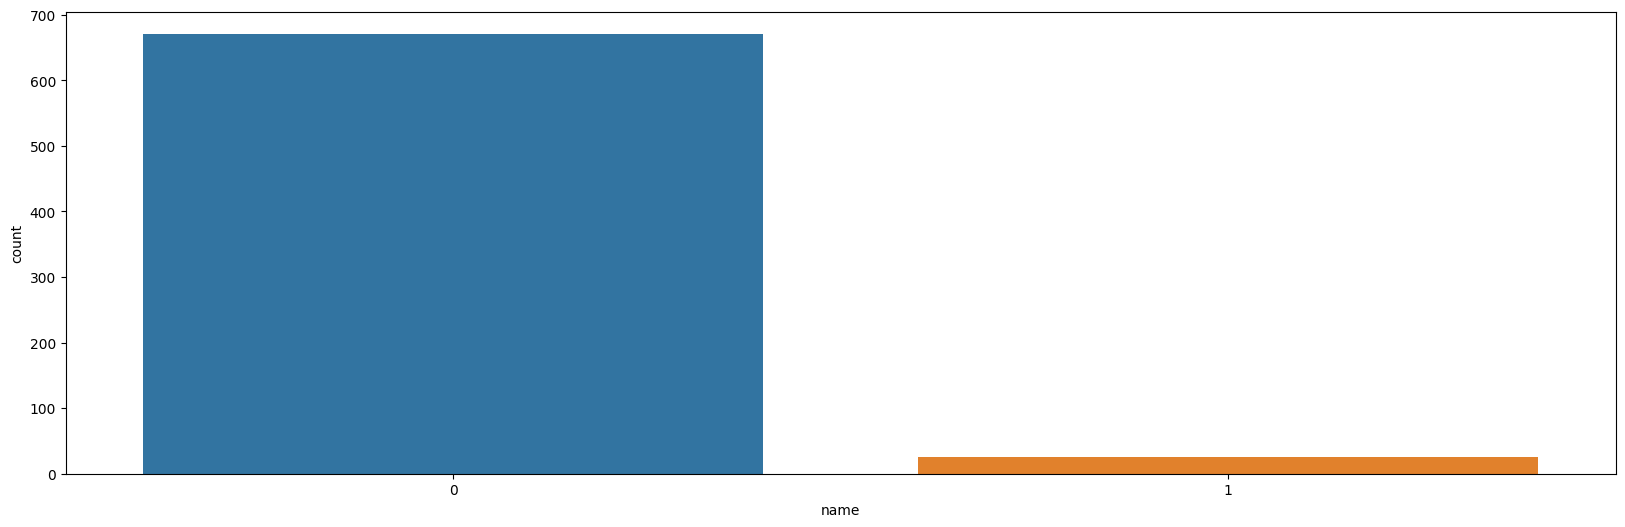

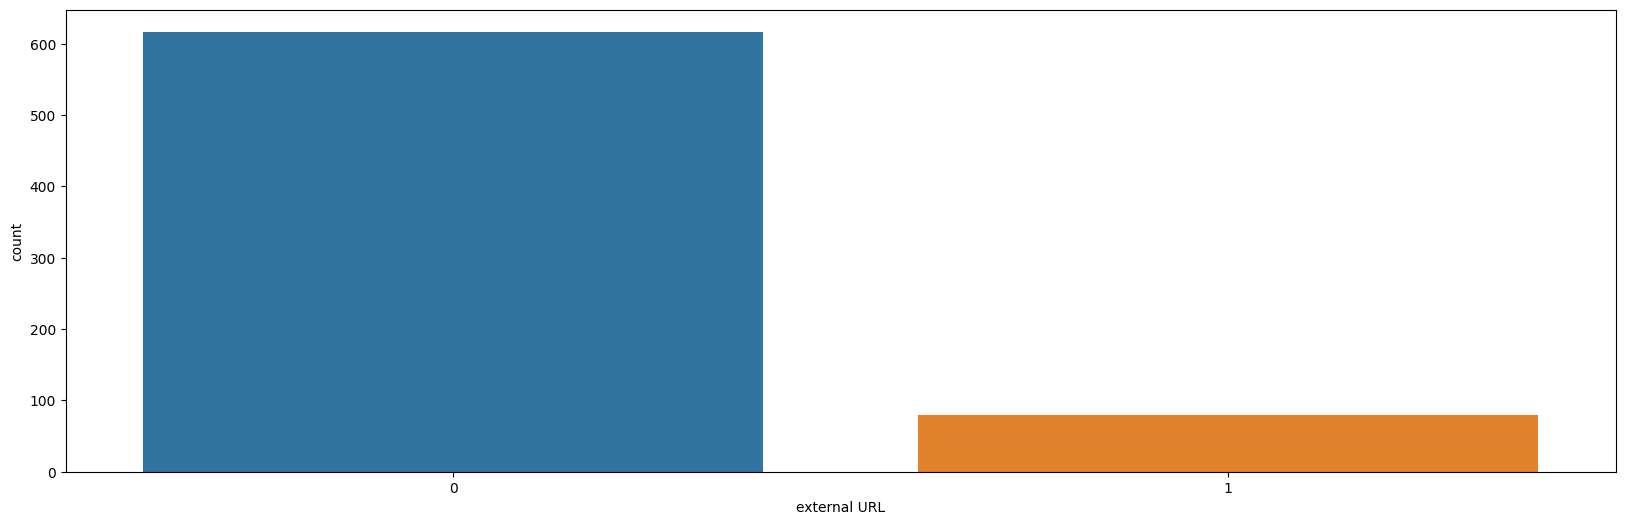

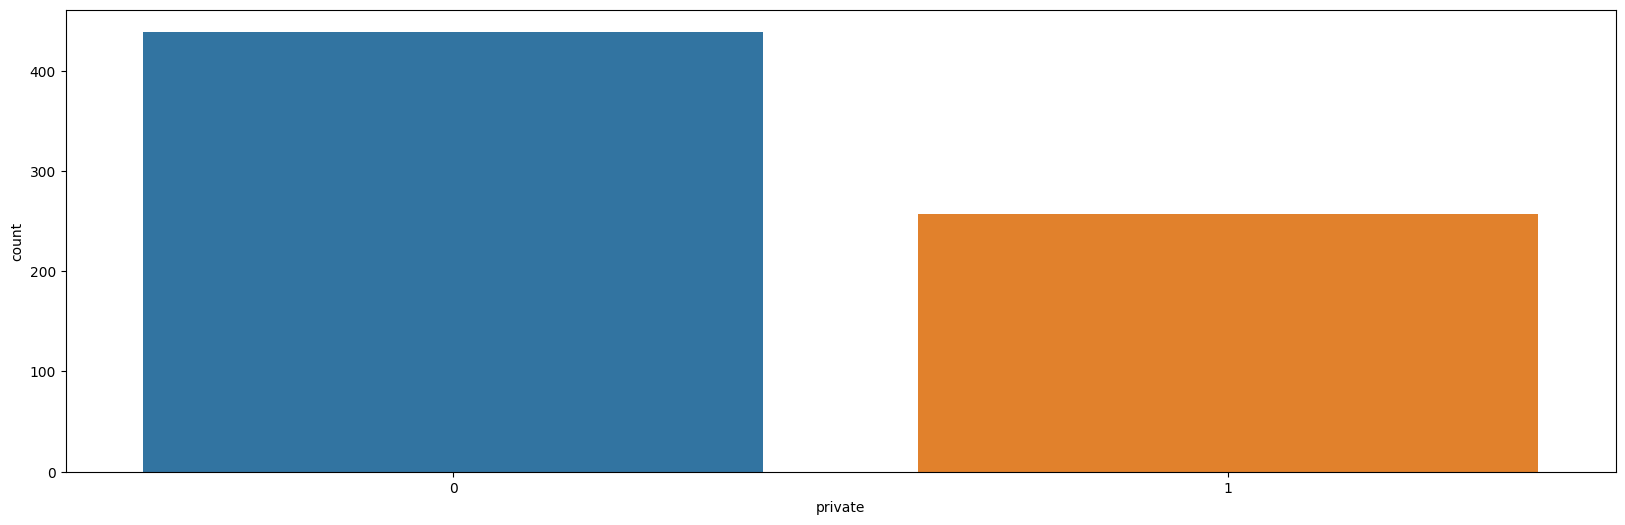

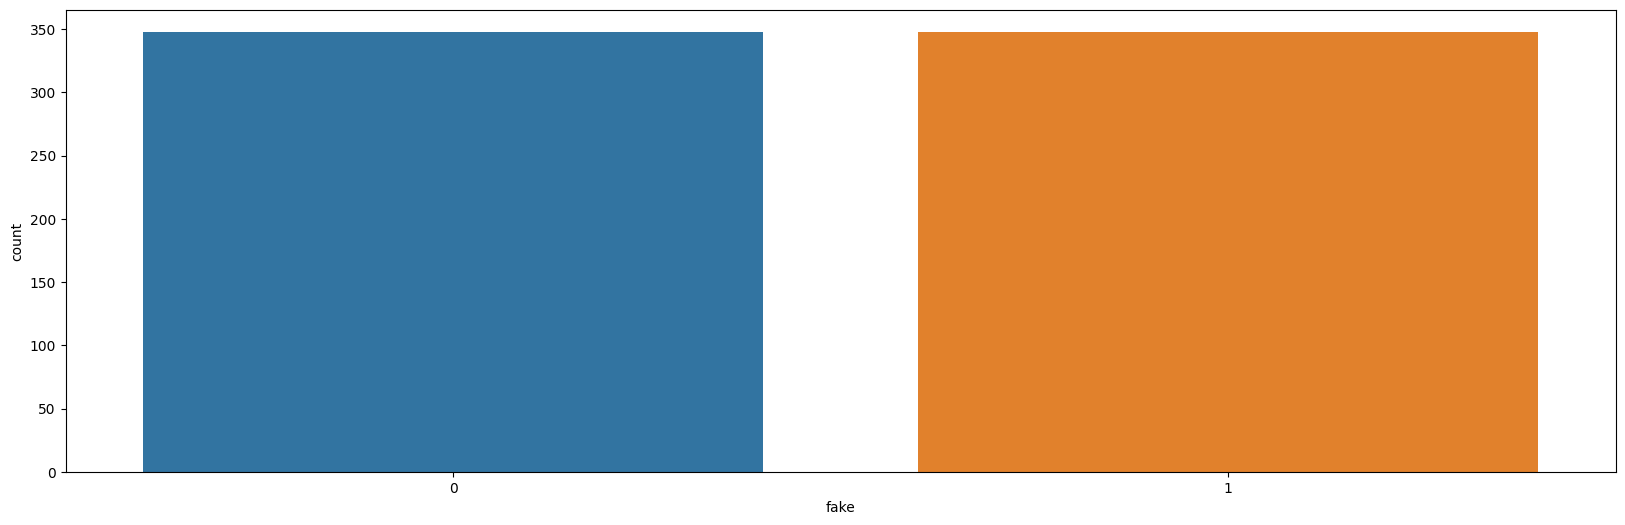

In [12]:
for i in df.columns:
    if df[i].nunique() == 2:
        sb.countplot(df, x = i)
        plt.show()

In [15]:
x, y = df.drop('fake', axis = 1), df.fake

In [16]:
x_train, y_train, x_test, y_test = tts(x, y, test_size = 0.2, random_state=546)

<Axes: ylabel='Density'>

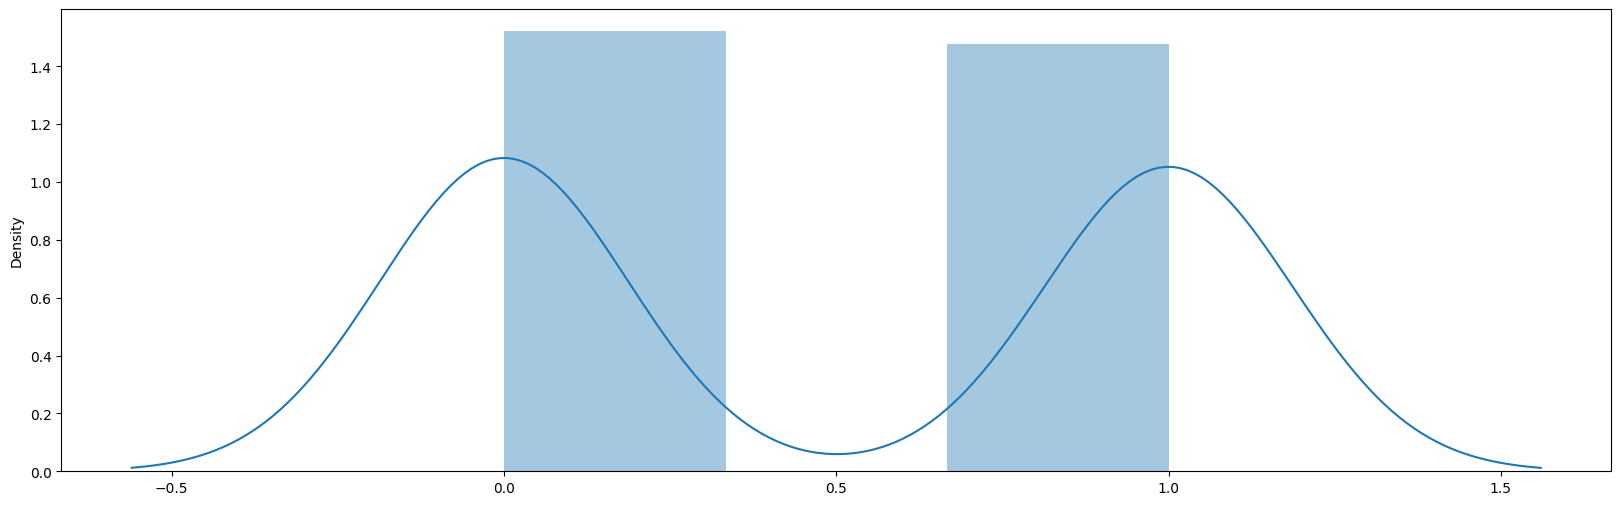

In [17]:
sb.distplot(x = y_test)

<Axes: ylabel='Density'>

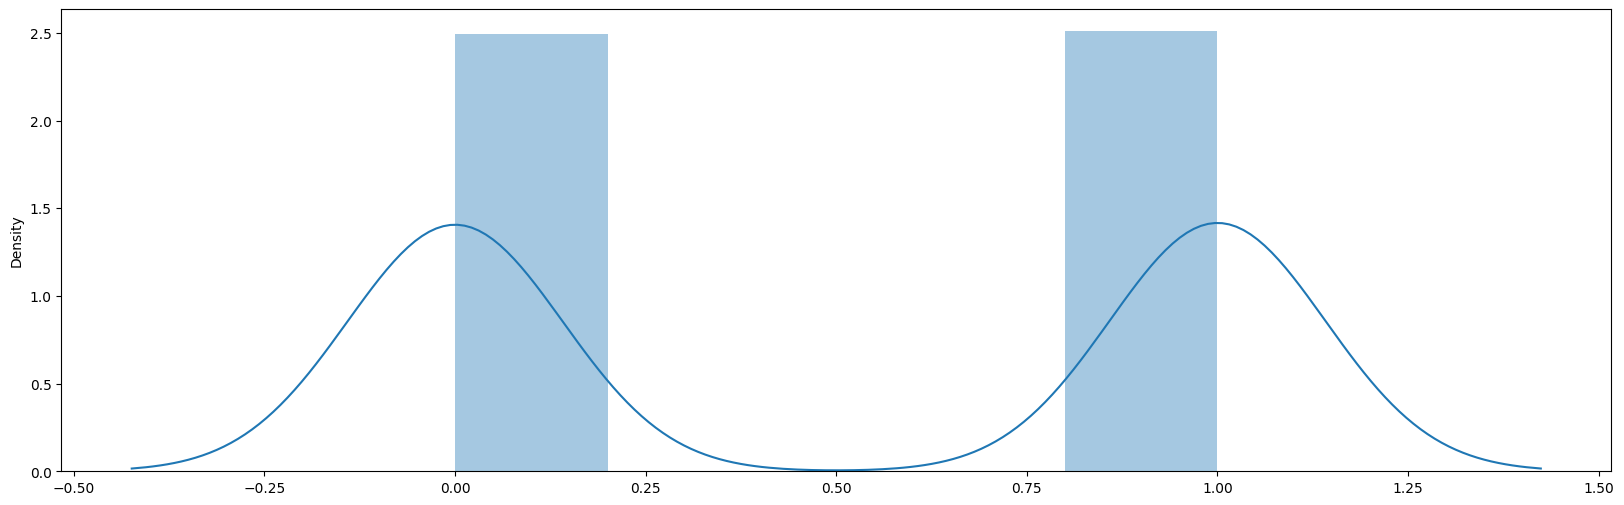

In [18]:
sb.distplot(x = x_test)

## Model

In [31]:
model = XGBClassifier().fit(x_train, x_test)
pred = model.predict(y_train)
print(accuracy_score(y_test, pred))

0.9071428571428571


In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        71
           1       0.92      0.88      0.90        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



<Axes: >

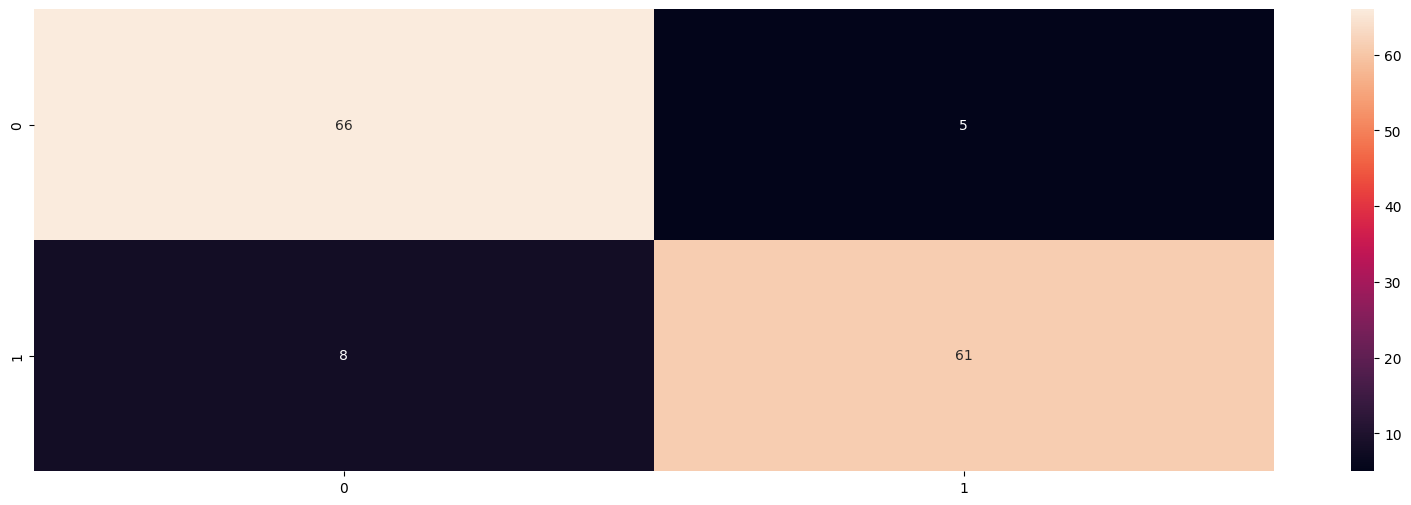

In [34]:
sb.heatmap(confusion_matrix(y_test, pred), annot = True)

In [25]:
'''with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    f.close()'''

In [26]:
'''with open('best_model.pkl', 'rb') as f:
    md = pickle.load(f)'''

In [29]:
md.predict([[1,0.27,0,0.0,0,53,0,0,32,1000,955]])

array([0])

In [36]:
df.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name', 'description length', 'external URL',
       'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')